<img src="https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d@2x.png" alt="NVIDIA Logo" style="width: 300px; height: auto;">


---


# Lab 2: Installing and Running AI Software

## Lab Overview

### Audience
The workbook is intended for technical training students.

### Objectives
In this practice, you will:

    ✓ Install the NVIDIA Container Toolkit on a server
    ✓ Run a container from NGC to train and recognize handwritten numbers

### Prerequisites and Guidelines
There are no prerequisites for this lab.

### Notice
Please follow the instructions below carefully to successfully complete the practice.
If you encounter technical issues, please contact the NVIDIA Networking Academy team:
nbu-academy-support@nvidia.com

---


## Practice 1: Install the Container Toolkit


Practice objectives:

In this exercise, you will install the NVIDIA Container Toolkit and check if the toolkit is installed and working properly by running a container.


### Task 1: Install the Container Toolkit


#### 1.1 - Configure a production repository:


In [ ]:
!curl -fsSL https://nvidia.github.io/libnvidia-container/gpgkey \
    | sudo gpg --dearmor --yes -o /usr/share/keyrings/nvidia-container-toolkit-keyring.gpg \
  && curl -s -L https://nvidia.github.io/libnvidia-container/stable/deb/nvidia-container-toolkit.list \
    | sed 's#deb https://#deb [signed-by=/usr/share/keyrings/nvidia-container-toolkit-keyring.gpg] https://#g' \
    | sudo tee /etc/apt/sources.list.d/nvidia-container-toolkit.list > /dev/null

#### 1.2 - Update the packages list from the repository:


In [ ]:
!sudo apt-get update

#### 1.3 - Install the NVIDIA Container Toolkit packages:


In [ ]:
!sudo apt-get install -y nvidia-container-toolkit

#### 1.4 - Configure a container runtime to enable support for NVIDIA GPUs via the NVIDIA Container Toolkit:


In [ ]:
!sudo nvidia-ctk runtime configure

#### 1.5 - Restart the Docker service:


In [ ]:
!sudo systemctl restart docker

---


### Task 2: Run the NVIDIA Container Toolkit


#### 2.1 - Run a container and check if the NVIDIA Container Toolkit operates as expected:


In [ ]:
!sudo docker run --rm --runtime=nvidia --gpus all ubuntu nvidia-smi

#### Your output should render the NVIDIA-SMI table without error

#### Task 2 Questions:

    ✓ What command is executed in the container?
    ✓ What is the driver version in your output?
    ✓ What is the CUDA version in your output?

---


## Practice 2: Docker Container


Practice objectives:

In this exercise you will use a Docker container with an NVIDIA GPU to build a simple neural network to recognize a numeral digit from an image file.

This exercise assumes that the previous exercise "Install Container Toolkit" was completed successfully.


### Task 1: Install and Run PyTorch Docker Container


#### 1.1 - Run the following command to install a container:


In [ ]:
!sudo docker pull nvcr.io/nvidia/pytorch:25.01-py3

---


### Task 2: Prepare Program Code Files for Training


The following code will train a model to recognize a numeral in a 24x24 pixel image.

Navigate to the `~/notebooks/module8` directory, which contains the following files:

    ✓ train.py – Program that trains the AI
    ✓ test.py – Program that uses the trained AI
    ✓ 2.png, 7.png and 8.png – Image files used to test the AI

You can create a few 24x24 pixel images using software like MS Paint, writing a number in each image, or using files downloaded from GitHub. In our example, these are the images we used with significant magnification:


In [ ]:
!ls ~/notebooks/module8/

---


### Task 3: Train the Model


#### 3.1 - Before you start training your model, run nvidia-smi and make sure to remember or write down the following information:

    ✓ The GPU's memory usage before training begins
    ✓ The current GPU utilization
    ✓ The list of processes currently running on the GPU

Retain these details for later reference.

In [ ]:
!nvidia-smi

#### 3.2 - Run the training using the command "python train.py". During the training, several epochs will run:

**Note:** This command will start the training script in the container we generated. It should output each epoch with the relevant stats.

In [ ]:
!sudo docker run --gpus all --ipc=host --rm -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u train.py 1 | tee /tmp/gpu_train.txt

#### 3.3 - While your model is training, run the nvidia-smi command in a terminal in a new tab.

To open a new terminal, click the **+** button in JupyterLab and select **Terminal** from the Launcher:

<div style="text-align: center;">
  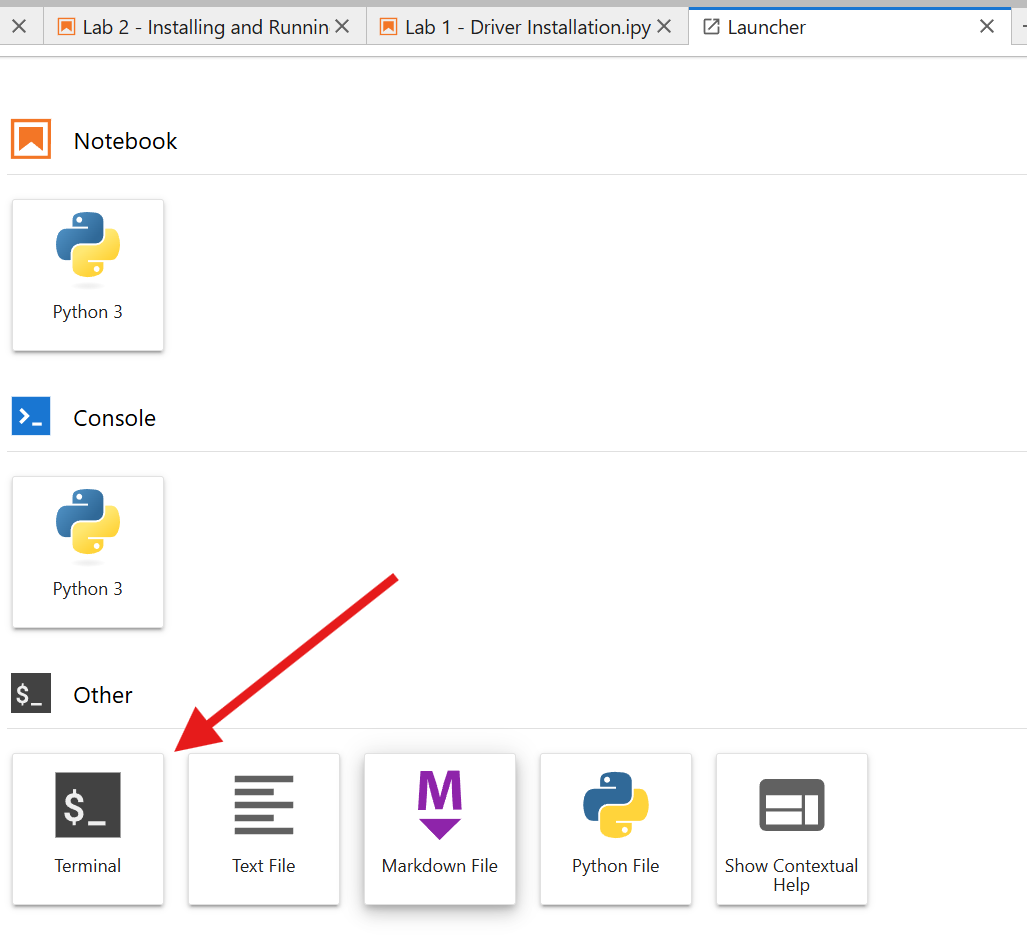
</div>

Compare the current output to what you observed before starting the training. Take note of the following:

    ✓ What was the GPU memory usage during training, compared to before you started?
    ✓ How did GPU utilization change during training?
    ✓ Which processes were running on the GPU during training?
    ✓ How much time did the model training take to complete?

---


We will import a simple helper script called `timer` that will compare GPU vs CPU performance at the end of this lab.


In [ ]:
from scripts import timer

### Task 4: Try the Trained Model


#### 4.1 - Use the test.py file to check if the trained model can recognize the numerals from the image files. 

By default, test.py will attempt to recognize the numeral in the file 7.png. To test a different file, provide its name as a parameter.

**Note:** These commands should be run from within the Docker container.

In [ ]:
!sudo docker run --gpus all --ipc=host --rm -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u test.py | tee /tmp/gpu_7.txt

#### 4.2 - Test with a different image file:

In [ ]:
!sudo docker run --gpus all --ipc=host --rm -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u test.py 8.png | tee /tmp/gpu_8.txt

---


### Task 5: Compare the Load on GPU vs CPU


#### 5.1 - Test Inference using CPU rather than GPU

**Note:** The `--gpus all` flag has been removed. The container will now run CPU-only, without utilizing the GPU.

In [ ]:
!sudo docker run --ipc=host --rm -e CUDA_VISIBLE_DEVICES= -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u test.py | tee /tmp/cpu_7.txt

#### 5.2 - The previously used files should still be in the container. Start training the model again but this time with CPU.

**Question:** How much time did the model training take compared to GPU training?


In [ ]:
!sudo docker run --ipc=host --rm -e CUDA_VISIBLE_DEVICES= -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u train.py 1 | tee /tmp/cpu_train.txt

#### 5.3 - View our Stats

In [ ]:
timer.summary()